{'whiskers': [<matplotlib.lines.Line2D at 0x27194149100>,
 'caps': [<matplotlib.lines.Line2D at 0x27194af21f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27184a86820>],
 'medians': [<matplotlib.lines.Line2D at 0x27194af2910>],
 'fliers': [<matplotlib.lines.Line2D at 0x27194af2ca0>],
 'means': []}

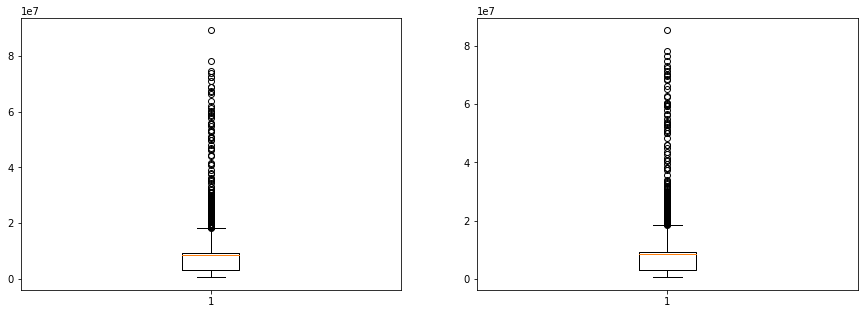

In [27]:
# See TOTAL_REVENUE, which includes total revenue data, and TOTAL_EXPENDITURE, which includes total spending data. Do these variables contain outliers?
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
warnings.filterwarnings('ignore')

states = pd.read_csv("states_all.csv")
states=states.fillna(states.mean())
states
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.boxplot(states["TOTAL_REVENUE"], )
plt.subplot(122)
plt.boxplot(states["TOTAL_EXPENDITURE"], )



{'whiskers': [<matplotlib.lines.Line2D at 0x27194a2e460>,
 'caps': [<matplotlib.lines.Line2D at 0x27194a2eb80>,
 'boxes': [<matplotlib.lines.Line2D at 0x27194a2e0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x27194a382e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27194a38670>],
 'means': []}

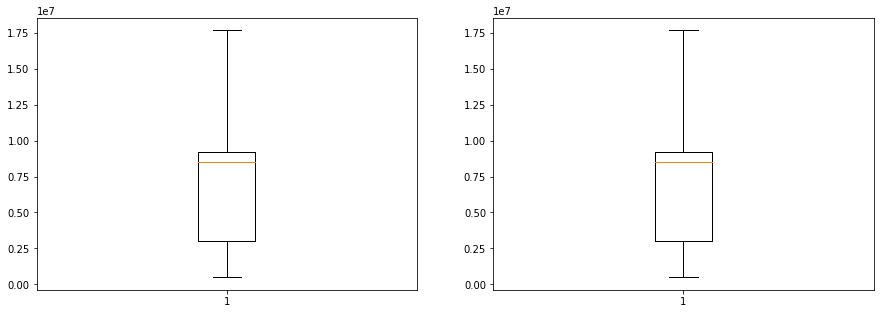

In [22]:
# If you find outliers in the total income TOTAL_REVENUE and total expenditure TOTAL_EXPENDITURE variables, eliminate these outliers by applying the techniques you learned in this lesson and verify that no outliers remain after doing this.
states_TOTAL_REVENUE = winsorize(states["TOTAL_REVENUE"], (0, 0.10))
states_TOTAL_EXPENDITURE = winsorize(states["TOTAL_EXPENDITURE"], (0, 0.10))
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.boxplot(states_TOTAL_EXPENDITURE)
plt.subplot(122)
plt.boxplot(states_TOTAL_EXPENDITURE)

{'whiskers': [<matplotlib.lines.Line2D at 0x27195ed5df0>,
 'caps': [<matplotlib.lines.Line2D at 0x27195ee4550>,
 'boxes': [<matplotlib.lines.Line2D at 0x27195ed5a60>],
 'medians': [<matplotlib.lines.Line2D at 0x27195ee4c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x27195ef0040>],
 'means': []}

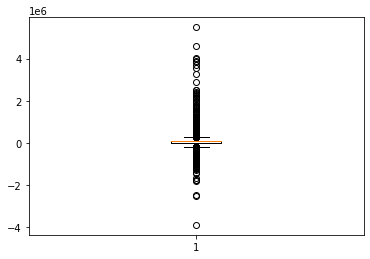

In [49]:
# Subtract the total expenditure TOTAL_EXPENDITURE from the total income variable TOTAL_REVENUE to create a variable that can be considered as a budget deficit (without failing to contradict the outliers). Are there any outliers in this new variable? If any, clear these outliers.

states['Diff'] = states["TOTAL_EXPENDITURE"]-states["TOTAL_REVENUE"]
plt.boxplot(states["Diff"])

{'whiskers': [<matplotlib.lines.Line2D at 0x271964e3400>,
 'caps': [<matplotlib.lines.Line2D at 0x271964e3b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x271964e3070>],
 'medians': [<matplotlib.lines.Line2D at 0x271964ee280>],
 'fliers': [<matplotlib.lines.Line2D at 0x271964ee610>],
 'means': []}

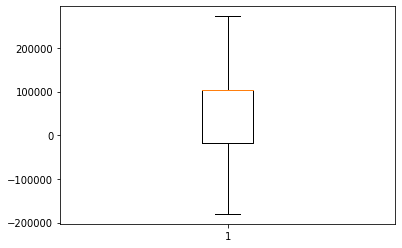

In [54]:
states_diff = winsorize(states["Diff"], (0.10, 0.13))
plt.boxplot(states_diff)

{'whiskers': [<matplotlib.lines.Line2D at 0x27196547550>,
 'caps': [<matplotlib.lines.Line2D at 0x27196547c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x271965471c0>],
 'medians': [<matplotlib.lines.Line2D at 0x271965513d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27196551760>],
 'means': []}

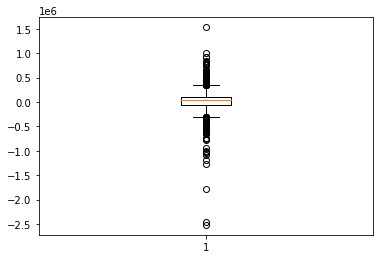

In [55]:
# Again create a variable that can be considered as a budget deficit by subtracting the total income TOTAL_REVENUE variable from the total expenditure TOTAL_EXPENDITURE. But this time, after clearing the outliers, do this. Are there any outliers in this new variable? It is useful to clean them, if any.
states['Diff2'] = states_TOTAL_EXPENDITURE-states_TOTAL_REVENUE
plt.boxplot(states["Diff2"])

{'whiskers': [<matplotlib.lines.Line2D at 0x271965b7100>,
 'caps': [<matplotlib.lines.Line2D at 0x271965b7820>,
 'boxes': [<matplotlib.lines.Line2D at 0x271965a7d60>],
 'medians': [<matplotlib.lines.Line2D at 0x271965b7f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x271965c2310>],
 'means': []}

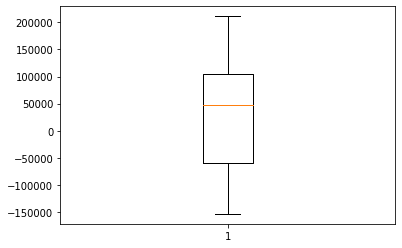

In [56]:
states_diff2 = winsorize(states["Diff2"], (0.10, 0.10))
plt.boxplot(states_diff2)

#Now, we have two different budget variables that we have created in the third and fourth questions. Do you see the difference between these two?

Medyanlar arasında ciddi bir fark görülüyor. 1. ve 3. çeyrekleri de winsorize yaptığımızda daha geniş olduğunu gördük.

###  If the budget deficit was a very important variable for us, which method would be better to clear out contrary values. Is it the method you applied in the third question or the method in the fourth question?

### Aykırı değeri kaldırıp baktığımızda daha anlaşılır bir grafik elimizde oluyor. 
